 # <div style="text-align: center">Shoot Outcome Prediction</div>

 ## <div style="text-align: center">Naive Bayes</div>

### Set-up

In [14]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# Importing the dataset
file_path = "/Users/ysadre/Desktop/NBA Expected Point/Data/"
dataset = pd.read_csv(file_path + "PredictIonProject.csv", delimiter=";")
dataset.head() #Return 10 rows

,player_name,CLOSEST_DEFENDER,PTS_TYPE,SHOT_DIST,SHOT_DIST^2/100,CLOSE_DEF_DIST,CLOSE_DEF_DIST.1,SHOT_RESULT
0,brian roberts,Anderson; Alan,2,77,59.29,13,1.69,1
1,brian roberts,Bogdanovic; Bojan,3,282,795.24,61,37.21,0
2,brian roberts,Bogdanovic; Bojan,2,101,102.01,9,0.81,0
3,brian roberts,Brown; Markel,2,172,295.84,34,11.56,0
4,brian roberts,Young; Thaddeus,2,37,13.69,11,1.21,0


In [16]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,2:7].values
y = dataset.iloc[:,7:8].values

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training

In [19]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

/Users/ysadre/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

### Model Evaluation

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy is:", ac)

Accuracy is: 0.5853829936753338


In [22]:
list1 = y_test.tolist()

newest = [i[0] for i in list1]
print(newest)

[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 

In [23]:
cm = confusion_matrix(y_true=newest, y_pred=y_pred)
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     #   plt.text(j, i, cm[i, j],
      #      horizontalalignment="center",
       #     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[8840 5201]
 [5419 6154]]


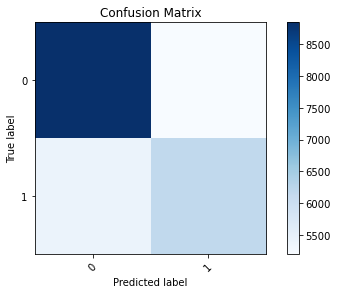

In [24]:
cm_plot_labels = ['0','1']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')